<a href="https://colab.research.google.com/github/ManavMoitra/Neural-Networks/blob/master/LE_NET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [15]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [4]:
import torchvision
import torchvision.transforms as transforms


In [5]:
trainset=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
classes=['plane','car','bird','cat','deer','dog','frog','horse','ship','drug']

In [7]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [8]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape)
print(images[0].shape)
print(images[1].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
3


In [9]:
img=images[0]
def imshow(img):
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

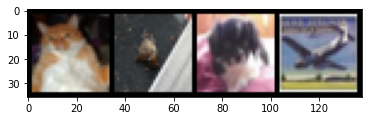


cat cat dog plane


In [10]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

In [17]:
import  torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
class Lenet(nn.Module):
  def __init__(self): 
        super(Lenet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
  def forward(self,x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x
       

        



In [30]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [31]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs,labels=inputs.to(device),labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [32]:
net=Lenet().to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net.parameters())


Epoch: 0/16, Test acc: 39.99, Train acc: 40.30
Epoch: 1/16, Test acc: 45.88, Train acc: 45.73
Epoch: 2/16, Test acc: 46.88, Train acc: 47.72
Epoch: 3/16, Test acc: 49.49, Train acc: 50.62
Epoch: 4/16, Test acc: 51.94, Train acc: 52.65
Epoch: 5/16, Test acc: 52.93, Train acc: 54.08
Epoch: 6/16, Test acc: 53.45, Train acc: 55.32
Epoch: 7/16, Test acc: 54.47, Train acc: 56.94
Epoch: 8/16, Test acc: 56.52, Train acc: 59.16
Epoch: 9/16, Test acc: 56.16, Train acc: 59.24
Epoch: 10/16, Test acc: 56.53, Train acc: 60.86
Epoch: 11/16, Test acc: 56.61, Train acc: 60.70
Epoch: 12/16, Test acc: 57.02, Train acc: 61.34
Epoch: 13/16, Test acc: 57.86, Train acc: 63.13
Epoch: 14/16, Test acc: 58.39, Train acc: 63.55
Epoch: 15/16, Test acc: 57.87, Train acc: 63.92


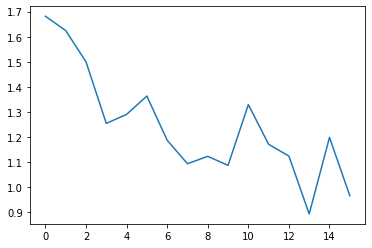

CPU times: user 4min 41s, sys: 9.58 s, total: 4min 50s
Wall time: 4min 51s


In [33]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs,labels=inputs.to(device),labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()


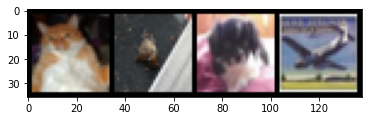

In [23]:
imshow(torchvision.utils.make_grid(images))

In [24]:
net = net.to('cpu')

In [25]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [26]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

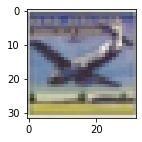

In [27]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


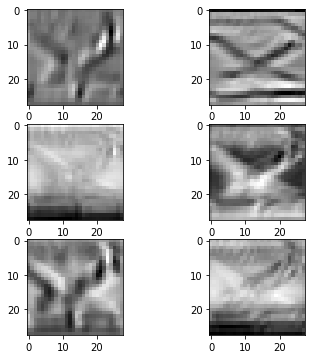

In [28]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()